Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Create dataset

In [2]:
# Create a synthetic dataset with multiple features
np.random.seed(42)
n_samples = 100

# Generate random features
X1 = 2 * np.random.rand(n_samples, 1)
X2 = 3 * np.random.rand(n_samples, 1)
X3 = np.random.rand(n_samples, 1)

# Stack the features together
X = np.hstack([X1, X2, X3])

# Generate the target variable with some noise
y = 5 + 4*X1 + 3*X2 + 2*X3 + np.random.randn(n_samples, 1)


Explore data

In [3]:
# Convert to a DataFrame for easier visualization
data = pd.DataFrame(np.hstack([X, y]), columns=["X1", "X2", "X3", "y"])
print(data.head())

         X1        X2        X3          y
0  0.749080  0.094288  0.642032   9.608819
1  1.901429  1.909231  0.084140  17.850088
2  1.463988  0.943068  0.161629  16.152357
3  1.197317  1.525712  0.898554  16.797431
4  0.312037  2.722699  0.606429  13.603963


Split the data into training and testing sets

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create and train the linear regression model

In [5]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [6]:
y_pred = model.predict(X_test)

Evaluate the model

In [7]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the Coefficient of Determination (R²)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 1.5833977954138456
R²: 0.8887298219181753
Intercept: [4.5943161]
Coefficients: [[4.348602   3.13026177 2.33845559]]


Interpret the Results
Intercept: This is the value of y when all the features X1, X2, and X3 are zero.
Coefficients: These represent the change in y for a one-unit change in each feature, holding other features constant.
Mean Squared Error (MSE): A measure of the average squared difference between the observed and predicted values. Lower values indicate better model performance.
R²: Indicates how well the model explains the variability of the target variable. A value closer to 1 indicates a good fit.

Visualize the coefficients

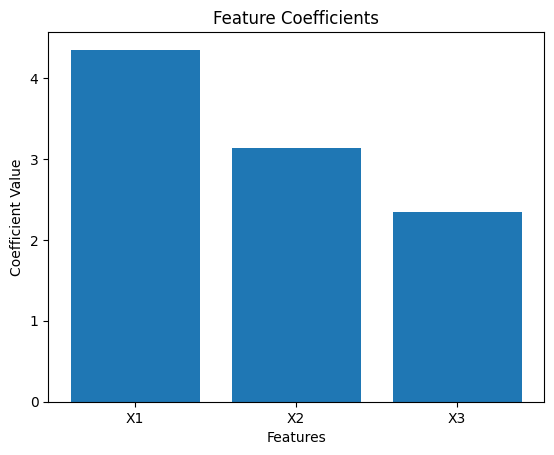

In [8]:
# Plot the coefficients
plt.bar(["X1", "X2", "X3"], model.coef_[0])
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

Example Explanation:
We generated a dataset where the target variable y is a linear combination of three features (X1, X2, X3), with some added noise.
The LinearRegression model is trained on the training set and then used to predict the target variable on the test set.
The evaluation metrics (MSE and R²) give us an idea of how well the model fits the data.
The intercept and coefficients provide the linear relationship between the features and the target variable.